In [1]:
# importing the required packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print('seaborn version\t:',sns.__version__)
pd.options.mode.chained_assignment = None 
pd.options.display.float_format = '{:.4f}'.format
pd.set_option('display.max_columns', 1000) 
pd.set_option('display.max_rows', 1000) 
plt.style.use('dark_background')

pd.set_option('display.max_columns', 5000)
pd.set_option('display.max_rows', 5000)

seaborn version	: 0.9.0


C:\Users\ybhatt\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# reading the dataset stored in a CSV file 
stock = pd.read_csv(r'stock_data.csv')
stock.head()

,Symbol,Period Ended,Quarter,Total Income,Total Expenses,Net Profit Loss from the Period,EPS,Price to earnings ratio,Number of shares,Market Cap,Price to sales ratio,Earnings Growth,PROJECTED EARNINGS GROWTH (PEG),Share Price,Share price change,Classification
0,ADANIPORTS,30-Sep-12,Second Quarter,105026.0000,54227.0000,27556.0000,1.3800,88.9000,2070051620,253959000000.0000,2418060.8100,0.0000,NaN,122.6800,5.8900,Bad
1,ADANIPORTS,31-Dec-12,Third Quarter,134990.0000,63994.0000,36109.0000,1.8000,72.1700,2003394100,260239000000.0000,1927841.0300,30.4300,2.3700,129.9000,5.8800,Bad
2,ADANIPORTS,31-Mar-13,Fourth Quarter,103551.0000,50802.0000,71031.0000,3.5500,37.5900,2003394100,267372000000.0000,2582029.2100,97.2200,0.3900,133.4600,2.7400,Bad
3,ADANIPORTS,30-Jun-13,First Quarter,147841.0000,77336.0000,41750.0000,2.0700,69.8700,2070051620,299373000000.0000,2024966.8900,-41.6900,-1.6800,144.6200,8.3600,Bad
4,ADANIPORTS,30-Sep-13,Second Quarter,114988.0000,57673.0000,34183.0000,1.6500,81.0900,2070051620,276959000000.0000,2408592.2500,-20.2900,-4.0000,133.7900,-7.4900,Bad


In [3]:
# observe the different feature type present in the data

stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2206 entries, 0 to 2205
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Symbol                           2206 non-null   object 
 1   Period Ended                     2206 non-null   object 
 2   Quarter                          2206 non-null   object 
 3   Total Income                     2206 non-null   float64
 4   Total Expenses                   2206 non-null   float64
 5   Net Profit Loss from the Period  2206 non-null   float64
 6   EPS                              2194 non-null   float64
 7   Price to earnings ratio          2194 non-null   float64
 8   Number of shares                 2206 non-null   int64  
 9   Market Cap                       2206 non-null   float64
 10  Price to sales ratio             2206 non-null   float64
 11  Earnings Growth                  2183 non-null   float64
 12  PROJECTED EARNINGS G

In [4]:
stock.shape

(2206, 16)

In [5]:
# Checking the percentage of missing values
print((round(100*stock.isnull().sum()/len(stock.index),2).sort_values(ascending=False)).head(50))

PROJECTED EARNINGS GROWTH (PEG)   1.5900
Earnings Growth                   1.0400
EPS                               0.5400
Price to earnings ratio           0.5400
Symbol                            0.0000
Period Ended                      0.0000
Quarter                           0.0000
Total Income                      0.0000
Total Expenses                    0.0000
Net Profit Loss from the Period   0.0000
Number of shares                  0.0000
Market Cap                        0.0000
Price to sales ratio              0.0000
Share Price                       0.0000
Share price change                0.0000
Classification                    0.0000
dtype: float64


In [6]:
# Create a list of 46 stocks present in the dataset

concat_list = list(stock['Symbol'].unique())

In [7]:
# Create a function to remove outliers

def remove_outliers(df, v):
    Q1 = df[v].quantile(0.25)
    Q3 = df[v].quantile(0.75)
    IQR = Q3-Q1
    df = df[~((df[v] < Q1 - 3 * IQR) | (df[v] > Q3 + 3 * IQR))]
    return(df)

In [8]:
# Create a single function that can handle missing values, remove outliers and perform feature scaling

def impute_mean_standardized_values(df):
    df = df.drop(["Period Ended",'Quarter','Share price change','Number of shares'],1)
    df.fillna(df.mean(),inplace=True)
    df = remove_outliers(df, 'Total Income')
    df = remove_outliers(df, 'Total Expenses')
    df = remove_outliers(df, 'Net Profit Loss from the Period')
    df = remove_outliers(df, 'EPS')
    df = remove_outliers(df, 'Price to earnings ratio')
    df = remove_outliers(df, 'Market Cap')
    df = remove_outliers(df, 'Price to sales ratio')
    df = remove_outliers(df, 'Earnings Growth')
    df = remove_outliers(df, 'PROJECTED EARNINGS GROWTH (PEG)')
    df = remove_outliers(df, 'Share Price')
    numeric_cols = df[['Total Income','Total Expenses','Net Profit Loss from the Period','EPS',
                 'Price to earnings ratio','Market Cap','Price to sales ratio',
                'Earnings Growth','PROJECTED EARNINGS GROWTH (PEG)','Share Price']]
    standardized_df = (numeric_cols-numeric_cols.mean())/numeric_cols.std()
    df = df.drop(['Total Income','Total Expenses','Net Profit Loss from the Period','EPS',
                 'Price to earnings ratio','Market Cap','Price to sales ratio',
                'Earnings Growth','PROJECTED EARNINGS GROWTH (PEG)','Share Price'], 1)
    new_std_df = pd.concat([df,standardized_df],axis=1)
    return(new_std_df)

In [9]:
# Exploring the classification variable

for i in concat_list:
    x = stock[stock['Symbol'] == i]
    x = impute_mean_standardized_values(x)
    print(i, x["Classification"].value_counts(), sep='\n')

ADANIPORTS
Bad     18
Good     7
Name: Classification, dtype: int64
ASIANPAINT
Bad     15
Good    15
Name: Classification, dtype: int64
AXISBANK
Bad     14
Good    12
Name: Classification, dtype: int64
BAJAJ-AUTO
Bad     24
Good     6
Name: Classification, dtype: int64
BAJFINANCE
Good    15
Bad     12
Name: Classification, dtype: int64
BAJAJFINSV
Bad     17
Good    12
Name: Classification, dtype: int64
BPCL
Bad     20
Good    13
Name: Classification, dtype: int64
BHARTIARTL
Bad     26
Good     7
Name: Classification, dtype: int64
BRITANNIA
Bad     25
Good    16
Name: Classification, dtype: int64
CIPLA
Bad     29
Good    12
Name: Classification, dtype: int64
COALINDIA
Bad     23
Good     5
Name: Classification, dtype: int64
DIVISLAB
Bad     28
Good    16
Name: Classification, dtype: int64
DRREDDY
Bad     29
Good    12
Name: Classification, dtype: int64
EICHERMOT
Bad     21
Good    20
Name: Classification, dtype: int64
GAIL
Bad     29
Good    14
Name: Classification, dtype: int64
GRASIM


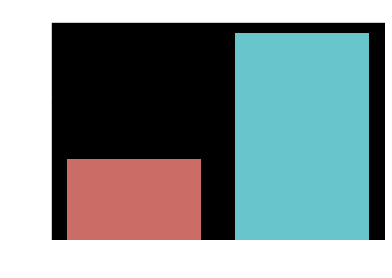

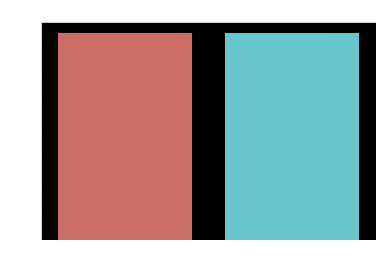

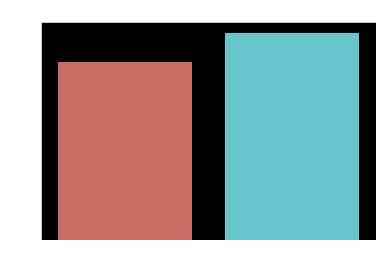

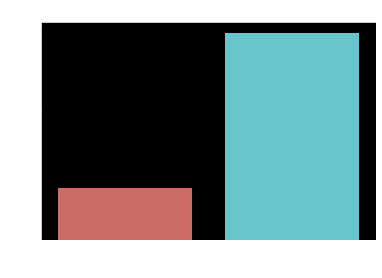

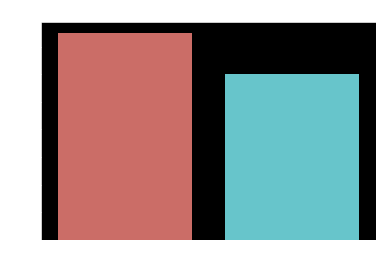

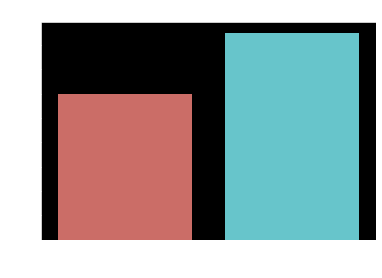

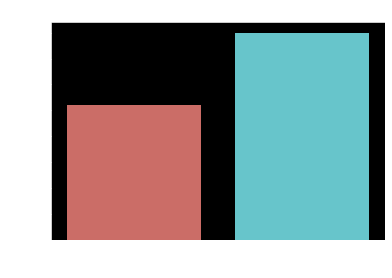

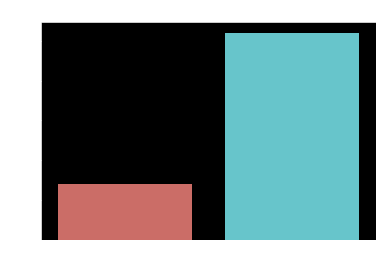

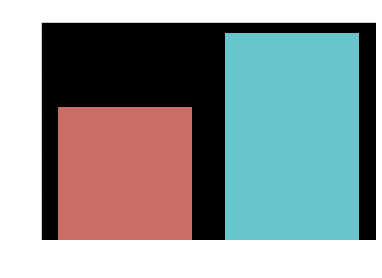

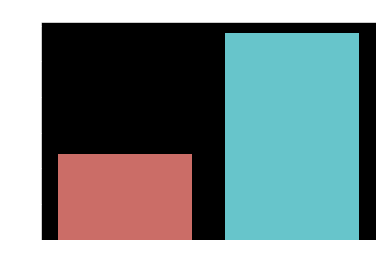

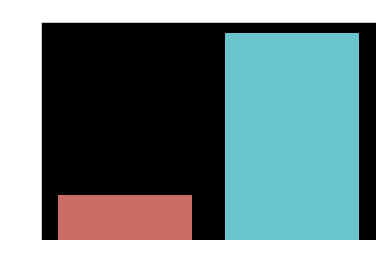

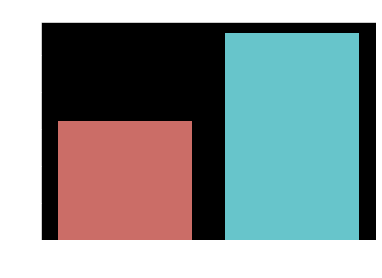

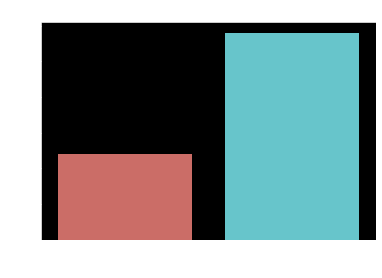

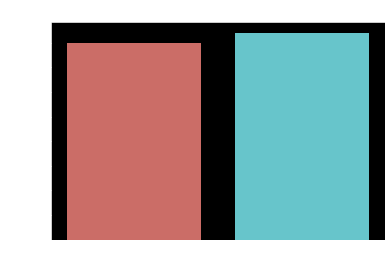

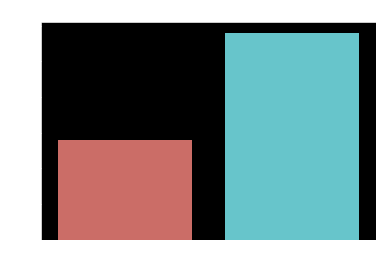

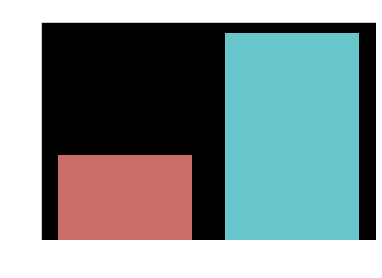

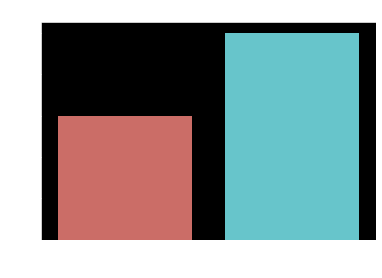

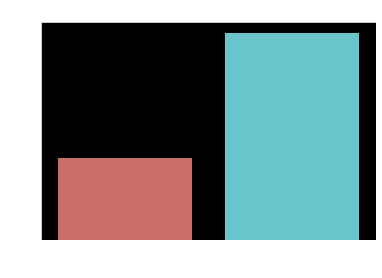

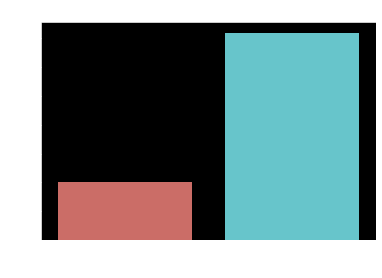

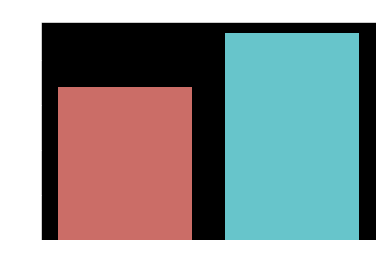

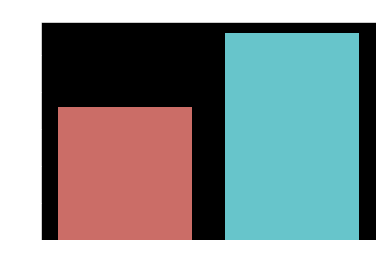

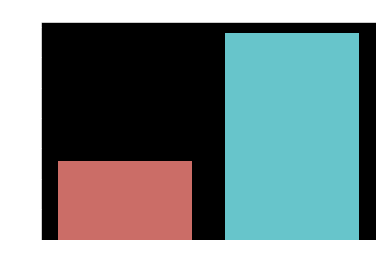

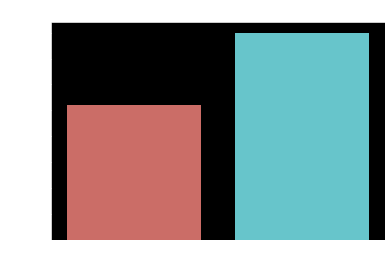

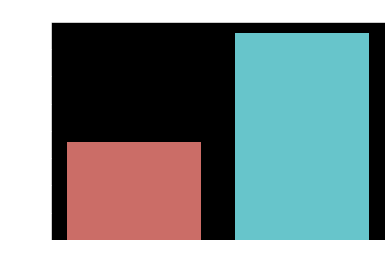

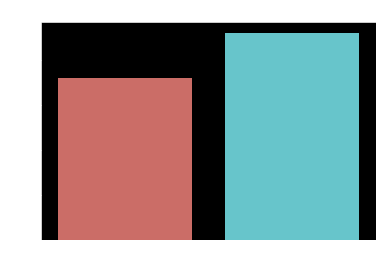

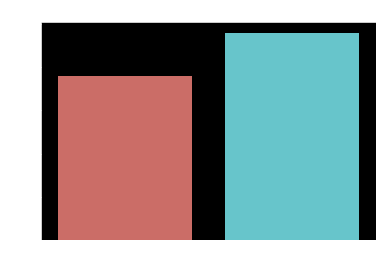

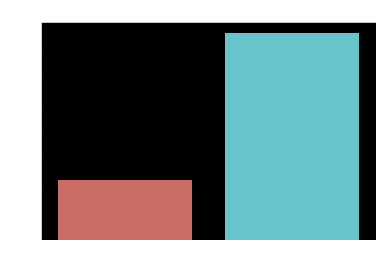

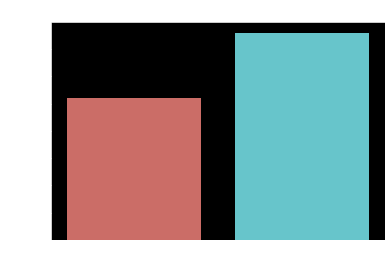

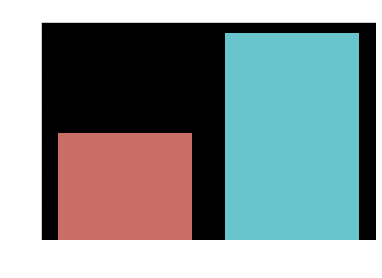

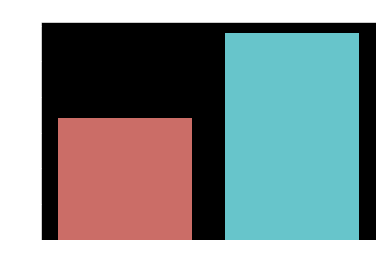

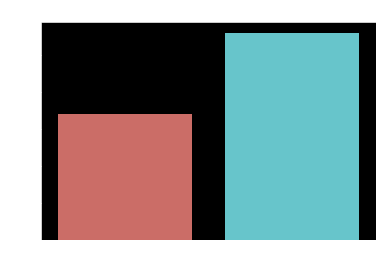

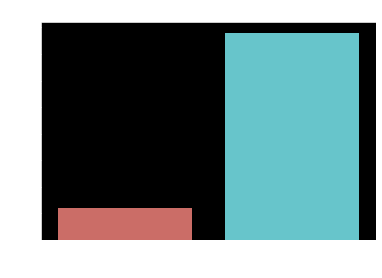

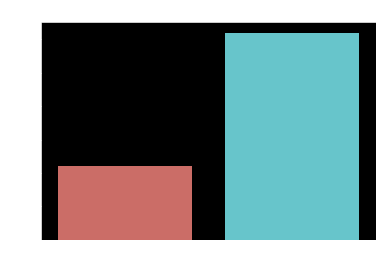

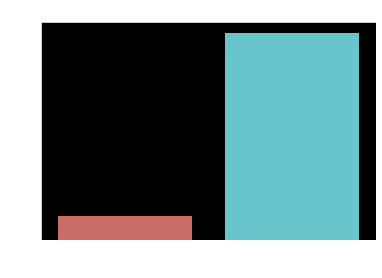

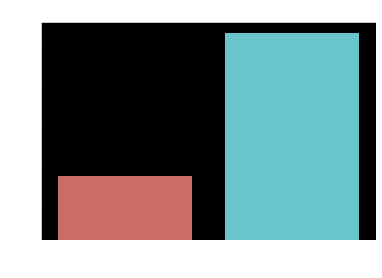

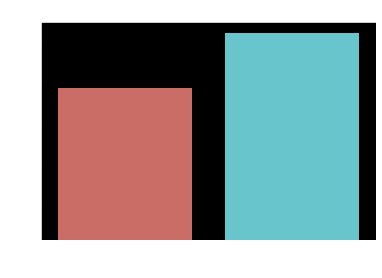

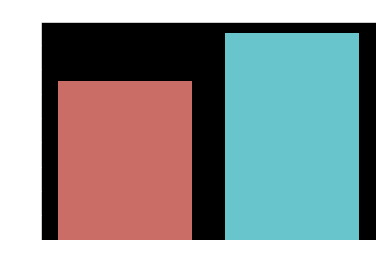

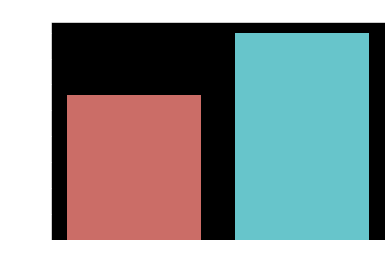

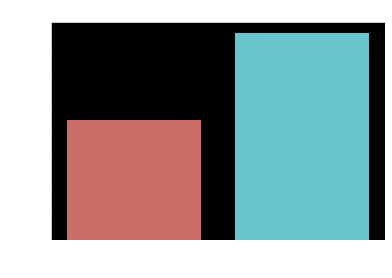

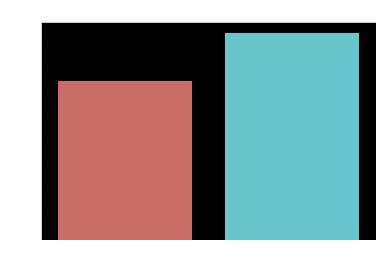

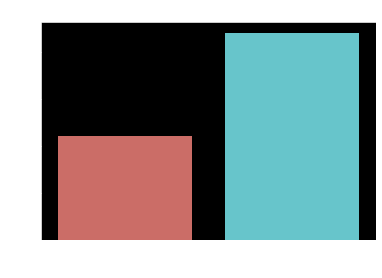

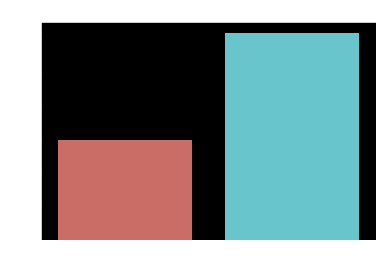

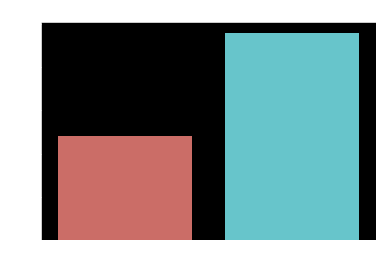

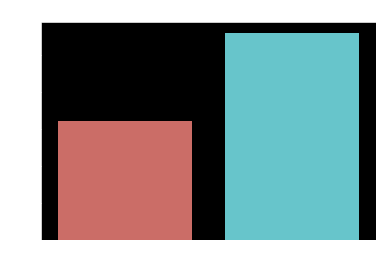

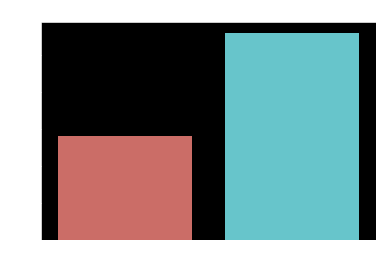

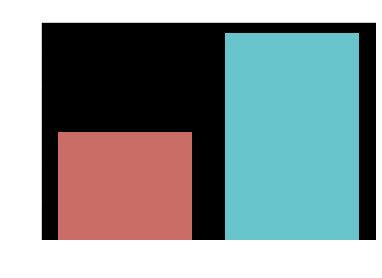

<Figure size 432x288 with 0 Axes>

In [10]:
# Visualize the distribution of classification variable

for i in concat_list:
    a = stock[stock['Symbol'] == i]
    a = impute_mean_standardized_values(a)
    sns.countplot(x='Classification',data = a, palette='hls', order=['Good','Bad']).set_title(i)
    plt.show()
    plt.savefig('Count_plot')

In [11]:
# Create a list of numerical feature columns

labels=['Total Income','Total Expenses','Net Profit Loss from the Period','EPS',
                 'Price to earnings ratio','Market Cap','Price to sales ratio',
                'Earnings Growth','PROJECTED EARNINGS GROWTH (PEG)','Share Price']

In [12]:
# Create a function to perform over sampling using SMOTE 

from imblearn.over_sampling import SMOTE

def over_sample(df):
    smote = SMOTE(sampling_strategy='minority', n_jobs=-1, k_neighbors=3, random_state=100)
    X_sm, y_sm = smote.fit_resample(df[labels], df['Classification'])
    df = pd.DataFrame(X_sm, columns=labels)
    df['Classification'] = y_sm
    return(df)

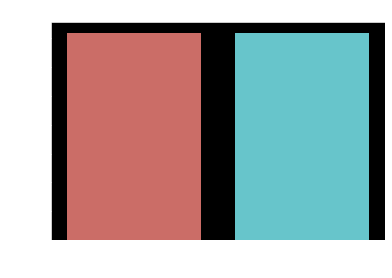

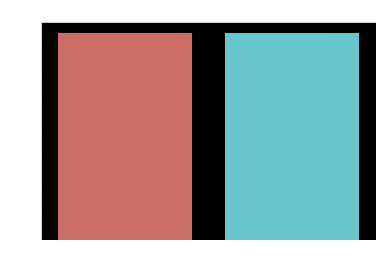

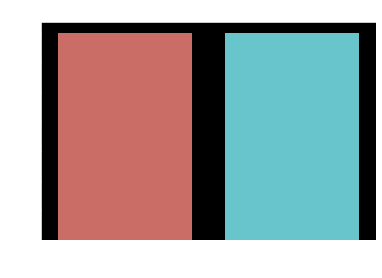

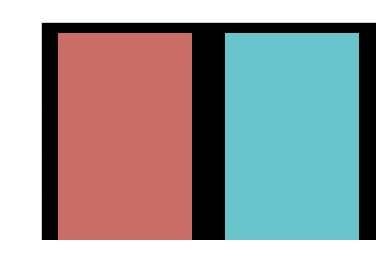

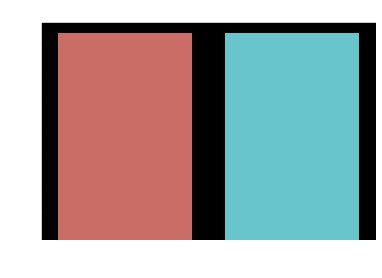

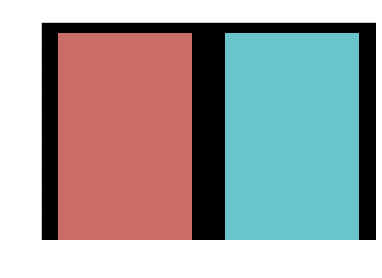

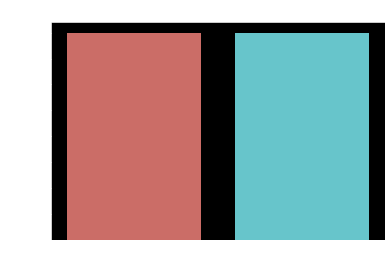

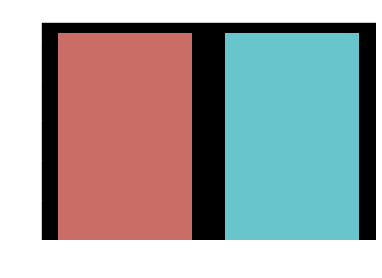

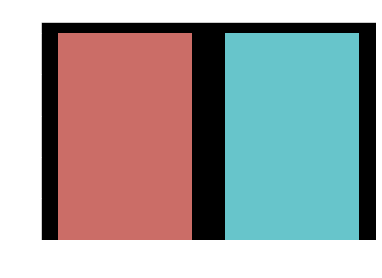

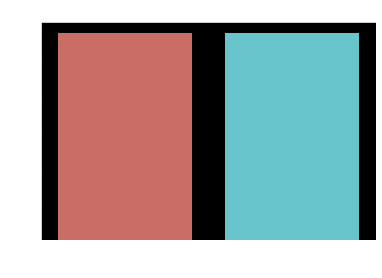

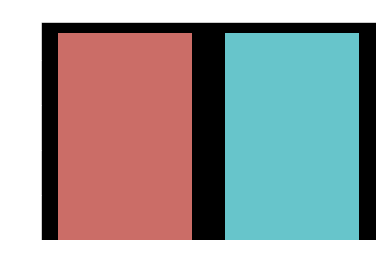

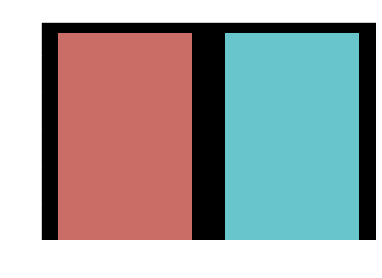

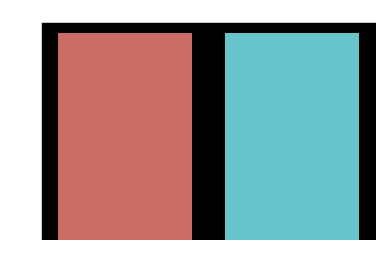

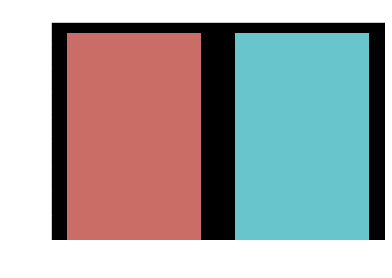

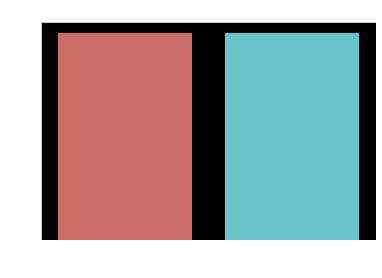

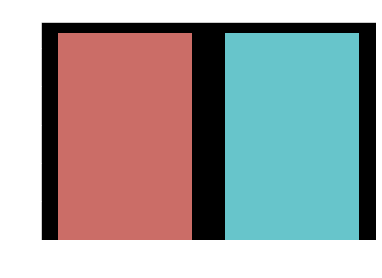

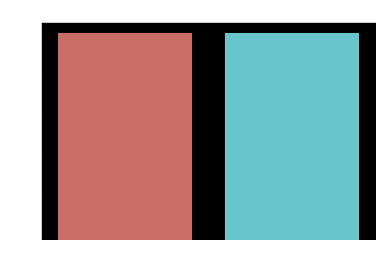

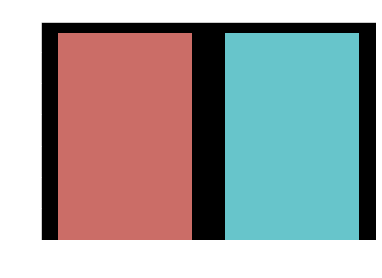

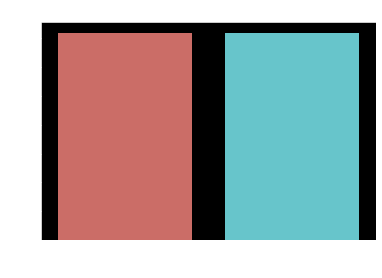

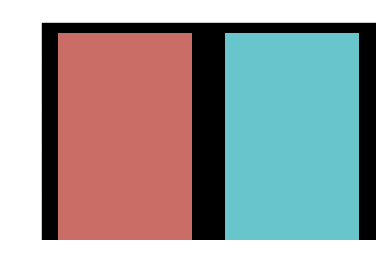

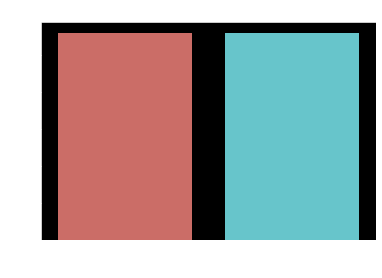

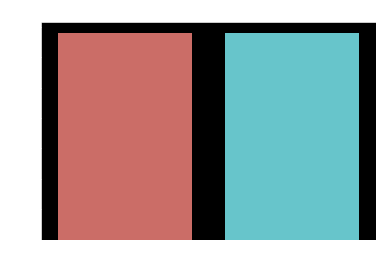

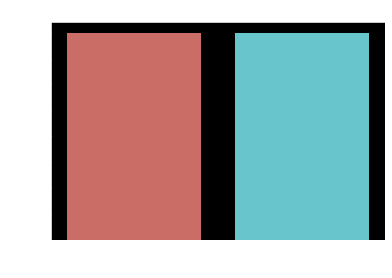

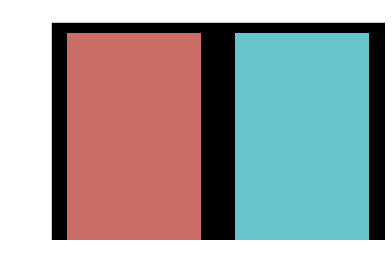

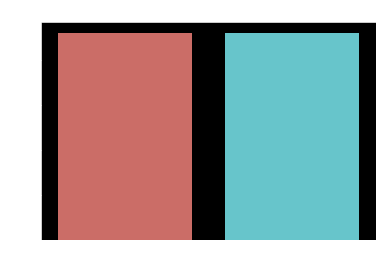

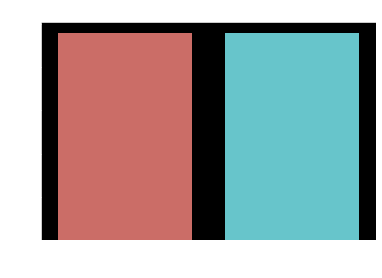

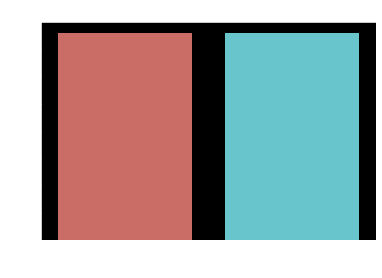

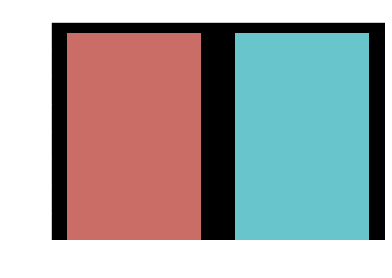

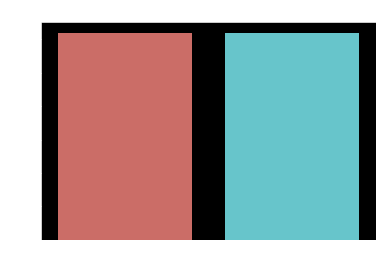

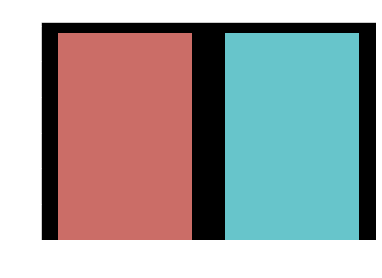

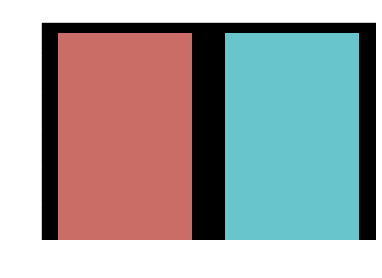

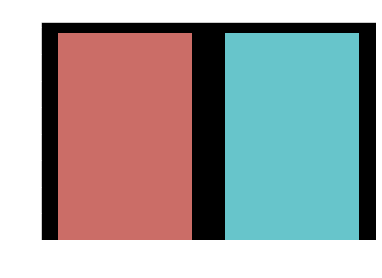

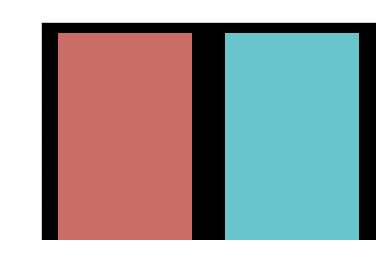

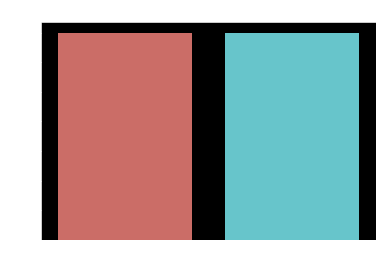

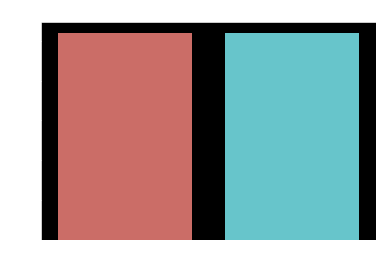

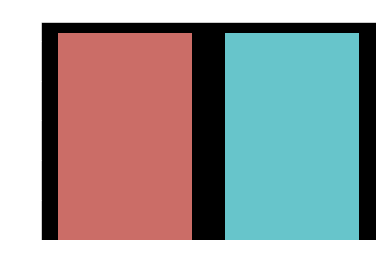

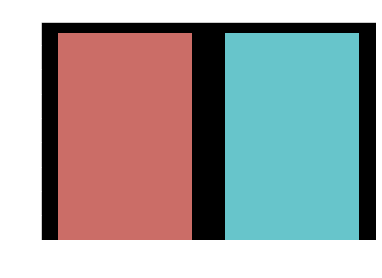

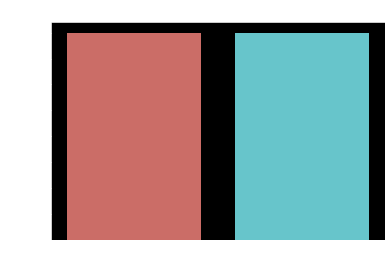

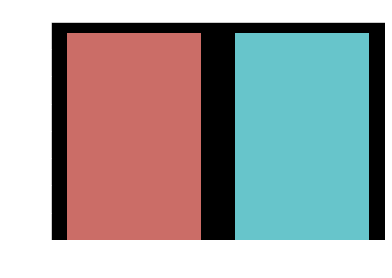

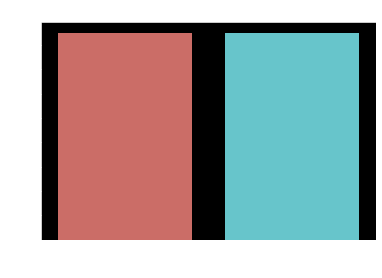

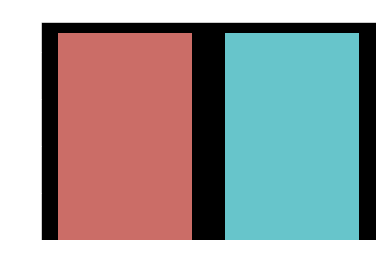

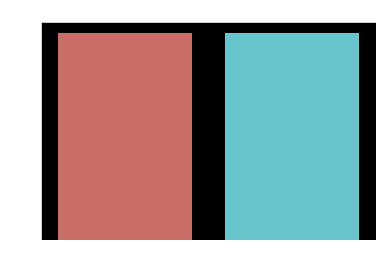

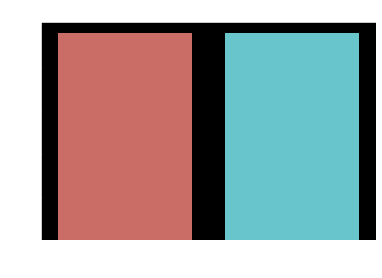

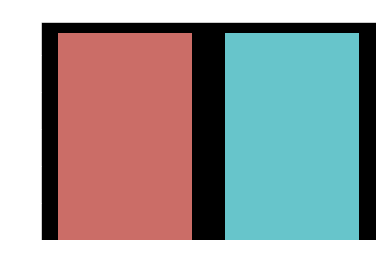

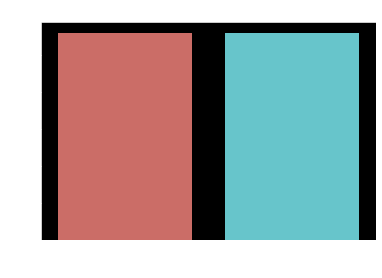

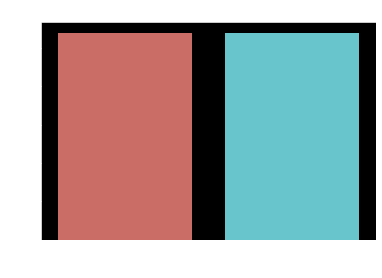

In [13]:
# Visualize the distribution of classification variable after applying SMOTE

smote_list = []

for i in concat_list:
    a = stock[stock['Symbol'] == i]
    standard_df = impute_mean_standardized_values(a)
    smote_df = over_sample(standard_df)
    smote_df.insert(loc=0, column = 'Symbol', value=i)
    sns.countplot(x='Classification', data = smote_df, palette='hls', order=['Good','Bad']).set_title(i)
    plt.show()

In [14]:
# Perform label encoding on the classification variable

stock['Classification'] = stock['Classification'].map({'Good': 1, 'Bad': 0})

## Logistic Regression Base Model

In [15]:
# Create a logistic regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


def split_df_lr(df):
    df = impute_mean_standardized_values(df)
    smote = SMOTE(sampling_strategy='minority', n_jobs=-1, k_neighbors=3, random_state=100)
    X_sm, y_sm = smote.fit_resample(df[labels], df['Classification'])
    df = pd.DataFrame(X_sm, columns=labels)
    df['Classification'] = y_sm
    X = df.drop(['Classification'],axis=1) # Putting feature variable to X
    y = df['Classification'] # Putting response variable to y
    X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)
    logsk = LogisticRegression()
    logsk.fit(X_train,y_train)
    y_pred = logsk.predict(X_test)
    precision = metrics.precision_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    return(logsk,precision,f1_score,recall,accuracy)

In [16]:
# Store the classification metrics ouput in a list

LR_base_metrics = []
for i in concat_list:
    x = stock[stock['Symbol'] == i]
    LR_base_metrics.append(split_df_lr(x))

### Logistic Regression GridSearch

In [17]:
# Create a logistic regression model by performing 5 fold cross validation

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


def log_reg_grid(df):
    df = impute_mean_standardized_values(df)
    smote = SMOTE(sampling_strategy='minority', n_jobs=-1, k_neighbors=3, random_state=100)
    X_sm, y_sm = smote.fit_resample(df[labels], df['Classification'])
    df = pd.DataFrame(X_sm, columns=labels)
    df['Classification'] = y_sm
    #df = df.drop(columns=['Symbol'])
    
    param_grid = { 'solver': ['newton-cg', 'lbfgs', 'liblinear'],
        'C': [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000],
        'penalty': ['l1','l2']
    }
    n_folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)
    X = df.drop(['Classification'],axis=1) # Putting feature variable to X
    y = df['Classification'] # Putting response variable to y
    X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)
    logsk = LogisticRegression()
    grid_search_logsk = GridSearchCV(estimator = logsk, param_grid = param_grid, 
                               cv = n_folds, verbose = 1, scoring="accuracy")
    grid_search_logsk.fit(X_train,y_train)
    clf = LogisticRegression(solver = grid_search_logsk.best_params_['solver'],
                             C = grid_search_logsk.best_params_['C'], 
                             penalty = grid_search_logsk.best_params_['penalty'], 
                             random_state = 100)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    precision = metrics.precision_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    return(clf,precision,f1_score,recall,accuracy) 

In [18]:
# Store the classification metrics ouput in a list

LR_gridsearch_metrics = []
for i in concat_list:
    x = stock[stock['Symbol'] == i]
    LR_gridsearch_metrics.append(log_reg_grid(x))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 

In [19]:
# Concatenate both the model outputs 

LR_final_df = pd.concat([pd.DataFrame(concat_list),pd.DataFrame(LR_base_metrics),pd.DataFrame(LR_gridsearch_metrics)], axis=1)
LR_final_df.columns = ['Symbol','LR CLF', 'LR Precision', 'LR F1 Score', 'LR Recall', 'LR Accuracy','GS CLF', 'GS Precision', 'GS F1 Score', 'GS Recall', 'GS Accuracy']
LR_final_df

,Symbol,LR CLF,LR Precision,LR F1 Score,LR Recall,LR Accuracy,GS CLF,GS Precision,GS F1 Score,GS Recall,GS Accuracy
0,ADANIPORTS,LogisticRegression(),1.0000,1.0000,1.0000,1.0000,"LogisticRegression(C=10, penalty='l1', random_...",1.0000,0.9091,0.8333,0.9091
1,ASIANPAINT,LogisticRegression(),0.3333,0.4444,0.6667,0.4444,"LogisticRegression(C=0.01, random_state=100, s...",0.3333,0.5000,1.0000,0.3333
2,AXISBANK,LogisticRegression(),0.6667,0.7273,0.8000,0.6667,"LogisticRegression(C=10, penalty='l1', random_...",0.5000,0.4444,0.4000,0.4444
3,BAJAJ-AUTO,LogisticRegression(),0.9000,0.9474,1.0000,0.9333,"LogisticRegression(C=100, penalty='l1', random...",0.8182,0.9000,1.0000,0.8667
4,BAJFINANCE,LogisticRegression(),0.5000,0.5000,0.5000,0.5556,"LogisticRegression(C=10, penalty='l1', random_...",0.6667,0.5714,0.5000,0.6667
5,BAJAJFINSV,LogisticRegression(),0.8000,0.5714,0.4444,0.4545,"LogisticRegression(C=0.01, penalty='l1', rando...",0.0000,0.0000,0.0000,0.1818
6,BPCL,LogisticRegression(),1.0000,0.6154,0.4444,0.5833,"LogisticRegression(C=0.1, random_state=100, so...",1.0000,0.5000,0.3333,0.5000
7,BHARTIARTL,LogisticRegression(),0.8571,0.7500,0.6667,0.7500,"LogisticRegression(C=10000, random_state=100, ...",0.8889,0.8889,0.8889,0.8750
8,BRITANNIA,LogisticRegression(),0.7143,0.6667,0.6250,0.6667,"LogisticRegression(C=1, penalty='l1', random_s...",0.6250,0.6250,0.6250,0.6000
9,CIPLA,LogisticRegression(),0.4545,0.5000,0.5556,0.4444,"LogisticRegression(C=100000, random_state=100,...",0.6364,0.7000,0.7778,0.6667


### SVM Base Model

In [20]:
# Create a SVM model

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics


def split_df_svm(df):
    df = impute_mean_standardized_values(df)
    smote = SMOTE(sampling_strategy='minority', n_jobs=-1, k_neighbors=3, random_state=100)
    X_sm, y_sm = smote.fit_resample(df[labels], df['Classification'])
    df = pd.DataFrame(X_sm, columns=labels)
    df['Classification'] = y_sm
    X = df.drop(['Classification'],axis=1) # Putting feature variable to X
    y = df['Classification'] # Putting response variable to y
    X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)
    svm_instance = svm.SVC()
    svm_instance.fit(X_train,y_train)
    y_pred = svm_instance.predict(X_test)
    precision = metrics.precision_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    return(svm_instance,precision,f1_score,recall,accuracy)

In [21]:
# Store the classification metrics ouput in a list

SVM_base_metrics = []
for i in concat_list:
    x = stock[stock['Symbol'] == i]
    SVM_base_metrics.append(split_df_svm(x))

### SVM GridSearch

In [22]:
# Create a SVM model by performing 5 fold cross validation

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

def svm_gs(df):
    df = impute_mean_standardized_values(df)
    smote = SMOTE(sampling_strategy='minority', n_jobs=-1, k_neighbors=3)
    X_sm, y_sm = smote.fit_resample(df[labels], df['Classification'])
    df = pd.DataFrame(X_sm, columns=labels)
    df['Classification'] = y_sm
    #df = df.drop(columns=['Symbol'])
    param_grid = { 'kernel' : ['linear','rbf'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'gamma': [0.001, 0.01, 0.1, 1, 10, 100]
    }
    n_folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)
    X = df.drop(['Classification'],axis=1) # Putting feature variable to X
    y = df['Classification'] # Putting response variable to y
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)
    
    #Initialize SVM classifier
    svm_gs_instance = svm.SVC()
    
    grid_search_svm = GridSearchCV(estimator = svm_gs_instance, param_grid = param_grid, 
                                   cv = n_folds, verbose = 1, scoring="accuracy")
    grid_search_svm.fit(X_train,y_train)
    clf = svm.SVC(kernel = grid_search_svm.best_params_['kernel'],
                  C = grid_search_svm.best_params_['C'], 
                  gamma = grid_search_svm.best_params_['gamma'],
                  random_state = 100)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    precision = metrics.precision_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    return(clf,precision,f1_score,recall,accuracy) 

In [23]:
# Store the classification metrics ouput in a list

SVM_gridsearch_metrics = []
for i in concat_list:
    x = stock[stock['Symbol'] == i]
    SVM_gridsearch_metrics.append(svm_gs(x))

Fitting 5 folds for each of 84 candidates, totalling 420 fits
Fitting 5 folds for each of 84 candidates, totalling 420 fits
Fitting 5 folds for each of 84 candidates, totalling 420 fits
Fitting 5 folds for each of 84 candidates, totalling 420 fits
Fitting 5 folds for each of 84 candidates, totalling 420 fits
Fitting 5 folds for each of 84 candidates, totalling 420 fits
Fitting 5 folds for each of 84 candidates, totalling 420 fits
Fitting 5 folds for each of 84 candidates, totalling 420 fits
Fitting 5 folds for each of 84 candidates, totalling 420 fits
Fitting 5 folds for each of 84 candidates, totalling 420 fits
Fitting 5 folds for each of 84 candidates, totalling 420 fits
Fitting 5 folds for each of 84 candidates, totalling 420 fits
Fitting 5 folds for each of 84 candidates, totalling 420 fits
Fitting 5 folds for each of 84 candidates, totalling 420 fits
Fitting 5 folds for each of 84 candidates, totalling 420 fits
Fitting 5 folds for each of 84 candidates, totalling 420 fits
Fitting 

In [24]:
# Concatenate the results of both the models

SVM_final_df = pd.concat([pd.DataFrame(concat_list),pd.DataFrame(SVM_base_metrics),pd.DataFrame(SVM_gridsearch_metrics)], axis=1)
SVM_final_df.columns = ['Symbol', 'SVM CLF', 'SVM Precision', 'SVM F1 Score', 'SVM Recall', 'SVM Accuracy','GS CLF', 'GS Precision', 'GS F1 Score', 'GS Recall', 'GS Accuracy']
SVM_final_df

,Symbol,SVM CLF,SVM Precision,SVM F1 Score,SVM Recall,SVM Accuracy,GS CLF,GS Precision,GS F1 Score,GS Recall,GS Accuracy
0,ADANIPORTS,SVC(),0.8571,0.9231,1.0000,0.9091,"SVC(C=1, gamma=0.001, kernel='linear', random_...",0.8571,0.9231,1.0000,0.9091
1,ASIANPAINT,SVC(),0.3333,0.5000,1.0000,0.3333,"SVC(C=0.001, gamma=0.001, kernel='linear', ran...",0.3333,0.5000,1.0000,0.3333
2,AXISBANK,SVC(),0.6667,0.5000,0.4000,0.5556,"SVC(C=1000, gamma=0.001, random_state=100)",0.6000,0.6000,0.6000,0.5556
3,BAJAJ-AUTO,SVC(),1.0000,1.0000,1.0000,1.0000,"SVC(C=10, gamma=0.1, random_state=100)",0.8889,0.8889,0.8889,0.8667
4,BAJFINANCE,SVC(),0.4000,0.4444,0.5000,0.4444,"SVC(C=10, gamma=0.1, random_state=100)",0.6667,0.5714,0.5000,0.6667
5,BAJAJFINSV,SVC(),0.0000,0.0000,0.0000,0.1818,"SVC(C=0.001, gamma=0.001, kernel='linear', ran...",0.0000,0.0000,0.0000,0.1818
6,BPCL,SVC(),0.7500,0.4615,0.3333,0.4167,"SVC(C=10, gamma=1, random_state=100)",1.0000,0.5000,0.3333,0.5000
7,BHARTIARTL,SVC(),1.0000,0.8750,0.7778,0.8750,"SVC(C=10, gamma=0.1, random_state=100)",1.0000,0.8750,0.7778,0.8750
8,BRITANNIA,SVC(),1.0000,0.5455,0.3750,0.6667,"SVC(C=10, gamma=1, random_state=100)",1.0000,0.6667,0.5000,0.7333
9,CIPLA,SVC(),0.5000,0.5714,0.6667,0.5000,"SVC(C=1, gamma=1, random_state=100)",0.5714,0.5000,0.4444,0.5556


## Naive Bayes base model

In [25]:
# Create a Naive Bayes model

from sklearn.model_selection import train_test_split
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics


def split_df_gnb(df):
    df = impute_mean_standardized_values(df)
    smote = SMOTE(sampling_strategy='minority', n_jobs=-1, k_neighbors=3, random_state=100)
    X_sm, y_sm = smote.fit_resample(df[labels], df['Classification'])
    df = pd.DataFrame(X_sm, columns=labels)
    df['Classification'] = y_sm
    X = df.drop(['Classification'],axis=1) # Putting feature variable to X
    y = df['Classification'] # Putting response variable to y
    X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)
    #Create a Gaussian Classifier
    gnb = GaussianNB()
    gnb.fit(X_train,y_train)
    y_pred = gnb.predict(X_test)
    precision = metrics.precision_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    return(gnb, precision,f1_score,recall,accuracy)

In [26]:
NB_base_metrics = []
for i in concat_list:
    x = stock[stock['Symbol'] == i]
    NB_base_metrics.append(split_df_gnb(x))

### Naive Bayes Grid Search

In [27]:
# Create a Naive Bayes model by performing 5 fold cross validation

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

def nb_grid(df):
    df = impute_mean_standardized_values(df)
    smote = SMOTE(sampling_strategy='minority', n_jobs=-1, k_neighbors=3)
    X_sm, y_sm = smote.fit_resample(df[labels], df['Classification'])
    df = pd.DataFrame(X_sm, columns=labels)
    df['Classification'] = y_sm

    param_grid = {
        'var_smoothing': [1e-8, 1e-7, 1e-6, 1e-5, 1e-4]
    }
    n_folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)
    
    X = df.drop(['Classification'],axis=1) # Putting feature variable to X
    y = df['Classification'] # Putting response variable to y
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)
    
    #Initialize GaussianNB classifier
    gnb = GaussianNB()
    
    grid_search_gnb = GridSearchCV(estimator = gnb, param_grid = param_grid, 
                                   cv = n_folds, verbose = 1, scoring="accuracy")
    grid_search_gnb.fit(X_train,y_train)
    
    clf_gnb = GaussianNB(var_smoothing = grid_search_gnb.best_params_['var_smoothing'])
    
    clf_gnb.fit(X_train, y_train)
    y_pred = clf_gnb.predict(X_test)
    precision = metrics.precision_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    return(clf_gnb,precision,f1_score,recall,accuracy)

In [28]:
# Store the classification metrics ouput in a list

NB_gridsearch_metrics = []
for i in concat_list:
    x = stock[stock['Symbol'] == i]
    NB_gridsearch_metrics.append(nb_grid(x))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates

In [29]:
NB_final_df = pd.concat([pd.DataFrame(concat_list),pd.DataFrame(NB_base_metrics),pd.DataFrame(NB_gridsearch_metrics)], axis=1)
NB_final_df.columns = ['Symbol','NB CLF', 'NB Precision', 'NB F1 Score', 'NB Recall', 'NB Accuracy','NB CLF', 'GS Precision', 'GS F1 Score', 'GS Recall', 'GS Accuracy']
NB_final_df

,Symbol,NB CLF,NB Precision,NB F1 Score,NB Recall,NB Accuracy,NB CLF,GS Precision,GS F1 Score,GS Recall,GS Accuracy
0,ADANIPORTS,GaussianNB(),0.7500,0.8571,1.0000,0.8182,GaussianNB(var_smoothing=1e-08),0.7143,0.7692,0.8333,0.7273
1,ASIANPAINT,GaussianNB(),0.2000,0.2500,0.3333,0.3333,GaussianNB(var_smoothing=1e-08),0.2000,0.2500,0.3333,0.3333
2,AXISBANK,GaussianNB(),0.6667,0.5000,0.4000,0.5556,GaussianNB(var_smoothing=1e-08),0.6000,0.6000,0.6000,0.5556
3,BAJAJ-AUTO,GaussianNB(),0.8750,0.8235,0.7778,0.8000,GaussianNB(var_smoothing=1e-08),0.8182,0.9000,1.0000,0.8667
4,BAJFINANCE,GaussianNB(),1.0000,0.6667,0.5000,0.7778,GaussianNB(var_smoothing=1e-08),1.0000,0.6667,0.5000,0.7778
5,BAJAJFINSV,GaussianNB(),0.8000,0.8421,0.8889,0.7273,GaussianNB(var_smoothing=1e-08),0.8571,0.7500,0.6667,0.6364
6,BPCL,GaussianNB(),0.8000,0.5714,0.4444,0.5000,GaussianNB(var_smoothing=1e-08),0.8571,0.7500,0.6667,0.6667
7,BHARTIARTL,GaussianNB(),0.8000,0.8421,0.8889,0.8125,GaussianNB(var_smoothing=1e-08),0.9000,0.9474,1.0000,0.9375
8,BRITANNIA,GaussianNB(),0.8571,0.8000,0.7500,0.8000,GaussianNB(var_smoothing=1e-08),0.8571,0.8000,0.7500,0.8000
9,CIPLA,GaussianNB(),0.7778,0.7778,0.7778,0.7778,GaussianNB(var_smoothing=1e-08),0.6250,0.5882,0.5556,0.6111


### KNN base model

In [31]:
# Create a KNN model

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


def split_df_knn(df):
    df = impute_mean_standardized_values(df)
    smote = SMOTE(sampling_strategy='minority', n_jobs=-1, k_neighbors=3, random_state=100)
    X_sm, y_sm = smote.fit_resample(df[labels], df['Classification'])
    df = pd.DataFrame(X_sm, columns=labels)
    df['Classification'] = y_sm
    X = df.drop(['Classification'],axis=1) # Putting feature variable to X
    y = df['Classification'] # Putting response variable to y
    X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)
    knn = KNeighborsClassifier()
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    precision = metrics.precision_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    return(knn,precision,f1_score,recall,accuracy)


In [32]:
# Store the classification metrics ouput in a list

KNN_base_metrics = []
for i in concat_list:
    x = stock[stock['Symbol'] == i]
    KNN_base_metrics.append(split_df_knn(x))

### KNN Grid Search

In [33]:
# Create a KNN model by performing 5 fold cross validation

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

def knn_grid(df):
    df = impute_mean_standardized_values(df)
    smote = SMOTE(sampling_strategy='minority', n_jobs=-1, k_neighbors=3)
    X_sm, y_sm = smote.fit_resample(df[labels], df['Classification'])
    df = pd.DataFrame(X_sm, columns=labels)
    df['Classification'] = y_sm
    param_grid = {
        'leaf_size': list(range(1,10)),
        'n_neighbors': list(range(1,10)),
        'p': [1, 2]
    }
    n_folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)
    X = df.drop(['Classification'],axis=1) # Putting feature variable to X
    y = df['Classification'] # Putting response variable to y
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)
    
    #Initialize KNN classifier
    knn = KNeighborsClassifier()
    
    grid_search_knn = GridSearchCV(estimator = knn, param_grid = param_grid, 
                                   cv = n_folds, verbose = 1, scoring="accuracy")
    grid_search_knn.fit(X_train,y_train)
    clf_knn = KNeighborsClassifier(leaf_size = grid_search_knn.best_params_['leaf_size'], 
                  n_neighbors = grid_search_knn.best_params_['n_neighbors'],
                  p = grid_search_knn.best_params_['p'])
    clf_knn.fit(X_train, y_train)
    y_pred = clf_knn.predict(X_test)
    precision = metrics.precision_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    return(clf_knn,precision,f1_score,recall,accuracy)

In [34]:
# Store the classification metrics ouput in a list

KNN_gridsearch_metrics = []
for i in concat_list:
    x = stock[stock['Symbol'] == i]
    KNN_gridsearch_metrics.append(knn_grid(x))

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Fitting 5 folds for each of 162 candidates, totalling 810 fits
Fitting 5 folds for each of 162 candidates, totalling 810 fits
Fitting 5 folds for each of 162 candidates, totalling 810 fits
Fitting 5 folds for each of 162 candidates, totalling 810 fits
Fitting 5 folds for each of 162 candidates, totalling 810 fits
Fitting 5 folds for each of 162 candidates, totalling 810 fits
Fitting 5 folds for each of 162 candidates, totalling 810 fits
Fitting 5 folds for each of 162 candidates, totalling 810 fits
Fitting 5 folds for each of 162 candidates, totalling 810 fits
Fitting 5 folds for each of 162 candidates, totalling 810 fits
Fitting 5 folds for each of 162 candidates, totalling 810 fits
Fitting 5 folds for each of 162 candidates, totalling 810 fits
Fitting 5 folds for each of 162 candidates, totalling 810 fits
Fitting 5 folds for each of 162 candidates, totalling 810 fits
Fitting 5 folds for each of 162 candidates, totalling 8

In [35]:
# Concatenate the results of both the models

KNN_final_df = pd.concat([pd.DataFrame(concat_list),pd.DataFrame(KNN_base_metrics),pd.DataFrame(KNN_gridsearch_metrics)], axis=1)
KNN_final_df.columns = ['Symbol','KNN base', 'KNN Precision', 'KNN F1 Score', 'KNN Recall', 'KNN Accuracy','GS CLF', 'GS Precision', 'GS F1 Score', 'GS Recall', 'GS Accuracy']
KNN_final_df

,Symbol,KNN base,KNN Precision,KNN F1 Score,KNN Recall,KNN Accuracy,GS CLF,GS Precision,GS F1 Score,GS Recall,GS Accuracy
0,ADANIPORTS,KNeighborsClassifier(),0.7500,0.8571,1.0000,0.8182,"KNeighborsClassifier(leaf_size=1, n_neighbors=...",1.0000,1.0000,1.0000,1.0000
1,ASIANPAINT,KNeighborsClassifier(),0.4286,0.6000,1.0000,0.5556,"KNeighborsClassifier(leaf_size=1, n_neighbors=...",0.3333,0.4444,0.6667,0.4444
2,AXISBANK,KNeighborsClassifier(),0.6000,0.6000,0.6000,0.5556,"KNeighborsClassifier(leaf_size=1, n_neighbors=2)",0.7500,0.6667,0.6000,0.6667
3,BAJAJ-AUTO,KNeighborsClassifier(),0.8182,0.9000,1.0000,0.8667,"KNeighborsClassifier(leaf_size=1, n_neighbors=1)",1.0000,0.9412,0.8889,0.9333
4,BAJFINANCE,KNeighborsClassifier(),0.4000,0.4444,0.5000,0.4444,"KNeighborsClassifier(leaf_size=1, n_neighbors=...",0.5000,0.5000,0.5000,0.5556
5,BAJAJFINSV,KNeighborsClassifier(),0.0000,0.0000,0.0000,0.1818,"KNeighborsClassifier(leaf_size=1, n_neighbors=3)",0.0000,0.0000,0.0000,0.1818
6,BPCL,KNeighborsClassifier(),0.8000,0.5714,0.4444,0.5000,"KNeighborsClassifier(leaf_size=1, n_neighbors=...",0.8333,0.6667,0.5556,0.5833
7,BHARTIARTL,KNeighborsClassifier(),0.9000,0.9474,1.0000,0.9375,"KNeighborsClassifier(leaf_size=1, n_neighbors=1)",1.0000,1.0000,1.0000,1.0000
8,BRITANNIA,KNeighborsClassifier(),0.5000,0.3333,0.2500,0.4667,"KNeighborsClassifier(leaf_size=1, n_neighbors=...",0.5000,0.5000,0.5000,0.4667
9,CIPLA,KNeighborsClassifier(),0.4167,0.4762,0.5556,0.3889,"KNeighborsClassifier(leaf_size=1, n_neighbors=1)",0.5385,0.6364,0.7778,0.5556


### Decision Trees base model

In [36]:
# Create a decision tree model

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


def split_df_dtree(df):
    df = impute_mean_standardized_values(df)
    smote = SMOTE(sampling_strategy='minority', n_jobs=-1, k_neighbors=3, random_state=100)
    X_sm, y_sm = smote.fit_resample(df[labels], df['Classification'])
    df = pd.DataFrame(X_sm, columns=labels)
    df['Classification'] = y_sm
    X = df.drop(['Classification'],axis=1) # Putting feature variable to X
    y = df['Classification'] # Putting response variable to y
    X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)
    #Create a DecisionTree Classifier
    dtree = DecisionTreeClassifier()
    dtree.fit(X_train,y_train)
    y_pred = dtree.predict(X_test)
    precision = metrics.precision_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    return(dtree,precision,f1_score,recall,accuracy)


In [37]:
# Store the classification metrics output in a list

Dtree_base_metrics = []
for i in concat_list:
    x = stock[stock['Symbol'] == i]
    Dtree_base_metrics.append(split_df_dtree(x))

### Decision Trees Grid Search

In [38]:
# Create a decision tree model by performing 5 fold cross validation

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

def d_tree_grid(df):
    df = impute_mean_standardized_values(df)
    smote = SMOTE(sampling_strategy='minority', n_jobs=-1, k_neighbors=3)
    X_sm, y_sm = smote.fit_resample(df[labels], df['Classification'])
    df = pd.DataFrame(X_sm, columns=labels)
    df['Classification'] = y_sm
    
    features = list(df.columns[1:])
    
    param_grid = {
        'max_depth': range(1, 15),
        'min_samples_leaf': range(1, 100, 20),
        'min_samples_split': range(1, 100, 10),
        'criterion': ["entropy", "gini"]
    }
    n_folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)
    X = df.drop(['Classification'],axis=1) # Putting feature variable to X
    y = df['Classification'] # Putting response variable to y
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)
    
    #Initialize Decision Tree classifier
    dtree = DecisionTreeClassifier()
    
    grid_search_dtree = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                                     cv = n_folds, verbose = 1, scoring="accuracy")
    
    grid_search_dtree.fit(X_train,y_train)
    
    clf_dtree = DecisionTreeClassifier(criterion = grid_search_dtree.best_estimator_.criterion, 
                                   max_depth = grid_search_dtree.best_estimator_.max_depth,
                                   min_samples_leaf = grid_search_dtree.best_estimator_.min_samples_leaf,
                                   min_samples_split = grid_search_dtree.best_estimator_.min_samples_split, 
                                   random_state = 100)
    clf_dtree.fit(X_train, y_train)
    y_pred = clf_dtree.predict(X_test)
    precision = metrics.precision_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    return(clf_dtree,precision,f1_score,recall,accuracy)

In [39]:
# Store the classification metrics output in a list

Dtree_gridsearch_metrics = []
for i in concat_list:
    x = stock[stock['Symbol'] == i]
    Dtree_gridsearch_metrics.append(d_tree_grid(x))

Fitting 5 folds for each of 1400 candidates, totalling 7000 fits
Fitting 5 folds for each of 1400 candidates, totalling 7000 fits
Fitting 5 folds for each of 1400 candidates, totalling 7000 fits
Fitting 5 folds for each of 1400 candidates, totalling 7000 fits
Fitting 5 folds for each of 1400 candidates, totalling 7000 fits
Fitting 5 folds for each of 1400 candidates, totalling 7000 fits
Fitting 5 folds for each of 1400 candidates, totalling 7000 fits
Fitting 5 folds for each of 1400 candidates, totalling 7000 fits
Fitting 5 folds for each of 1400 candidates, totalling 7000 fits
Fitting 5 folds for each of 1400 candidates, totalling 7000 fits
Fitting 5 folds for each of 1400 candidates, totalling 7000 fits
Fitting 5 folds for each of 1400 candidates, totalling 7000 fits
Fitting 5 folds for each of 1400 candidates, totalling 7000 fits
Fitting 5 folds for each of 1400 candidates, totalling 7000 fits
Fitting 5 folds for each of 1400 candidates, totalling 7000 fits
Fitting 5 folds for each 

In [41]:
# Concatenate the outputs of both the model

Dtree_final_df = pd.concat([pd.DataFrame(concat_list),pd.DataFrame(Dtree_base_metrics),pd.DataFrame(Dtree_gridsearch_metrics)], axis=1)
Dtree_final_df.columns = ['Symbol', 'DTree Base', 'DTree Precision', 'DTree F1 Score', 'DTree Recall', 'DTree Accuracy','GS CLF', 'GS Precision', 'GS F1 Score', 'GS Recall', 'GS Accuracy']
Dtree_final_df

,Symbol,DTree Base,DTree Precision,DTree F1 Score,DTree Recall,DTree Accuracy,GS CLF,GS Precision,GS F1 Score,GS Recall,GS Accuracy
0,ADANIPORTS,DecisionTreeClassifier(),0.6667,0.6667,0.6667,0.6364,"DecisionTreeClassifier(max_depth=14, min_sampl...",0.7500,0.8571,1.0000,0.8182
1,ASIANPAINT,DecisionTreeClassifier(),0.6667,0.6667,0.6667,0.7778,"DecisionTreeClassifier(criterion='entropy', ma...",0.4286,0.6000,1.0000,0.5556
2,AXISBANK,DecisionTreeClassifier(),0.8000,0.8000,0.8000,0.7778,"DecisionTreeClassifier(criterion='entropy', ma...",0.0000,0.0000,0.0000,0.4444
3,BAJAJ-AUTO,DecisionTreeClassifier(),0.8182,0.9000,1.0000,0.8667,"DecisionTreeClassifier(criterion='entropy', ma...",0.8750,0.8235,0.7778,0.8000
4,BAJFINANCE,DecisionTreeClassifier(),0.5000,0.5000,0.5000,0.5556,"DecisionTreeClassifier(criterion='entropy', ma...",1.0000,0.4000,0.2500,0.6667
5,BAJAJFINSV,DecisionTreeClassifier(),0.5000,0.1818,0.1111,0.1818,"DecisionTreeClassifier(criterion='entropy', ma...",0.7143,0.6250,0.5556,0.4545
6,BPCL,DecisionTreeClassifier(),1.0000,0.6154,0.4444,0.5833,"DecisionTreeClassifier(criterion='entropy', ma...",0.0000,0.0000,0.0000,0.2500
7,BHARTIARTL,DecisionTreeClassifier(),0.7143,0.6250,0.5556,0.6250,"DecisionTreeClassifier(max_depth=3, min_sample...",0.7000,0.7368,0.7778,0.6875
8,BRITANNIA,DecisionTreeClassifier(),1.0000,0.8571,0.7500,0.8667,"DecisionTreeClassifier(criterion='entropy', ma...",0.7500,0.5000,0.3750,0.6000
9,CIPLA,DecisionTreeClassifier(),0.6364,0.7000,0.7778,0.6667,"DecisionTreeClassifier(max_depth=1, min_sample...",0.6250,0.5882,0.5556,0.6111


### Random Forest base model

In [42]:
# Create a random forest model

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


def split_df_rf(df):
    df = impute_mean_standardized_values(df)
    smote = SMOTE(sampling_strategy='minority', n_jobs=-1, k_neighbors=3, random_state=100)
    X_sm, y_sm = smote.fit_resample(df[labels], df['Classification'])
    df = pd.DataFrame(X_sm, columns=labels)
    df['Classification'] = y_sm
    X = df.drop(['Classification'],axis=1) # Putting feature variable to X
    y = df['Classification'] # Putting response variable to y
    X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)
    #Create a RandomForest Classifier
    rf = RandomForestClassifier()
    rf.fit(X_train,y_train)
    y_pred = rf.predict(X_test)
    precision = metrics.precision_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    return(rf,precision,f1_score,recall,accuracy)


In [43]:
# Store the classification metrics output in a list

RF_base_metrics = []
for i in concat_list:
    x = stock[stock['Symbol'] == i]
    RF_base_metrics.append(split_df_rf(x))

### Random Forest Grid Search

In [44]:
# Create a random forest model by performing 5 fold cross validation

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

def rf_grid(df):
    df = impute_mean_standardized_values(df)
    smote = SMOTE(sampling_strategy='minority', n_jobs=-1, k_neighbors=3)
    X_sm, y_sm = smote.fit_resample(df[labels], df['Classification'])
    df = pd.DataFrame(X_sm, columns=labels)
    df['Classification'] = y_sm
    
    param_grid = {
        'max_depth': [2, 4, 8, 10],
        'min_samples_leaf': range(1, 100, 20),
        'min_samples_split': range(2, 100, 20),
        'n_estimators': [50, 100, 200, 300, 400, 500], 
        'max_features': ['auto']
    }
    n_folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)
    X = df.drop(['Classification'],axis=1) # Putting feature variable to X
    y = df['Classification'] # Putting response variable to y
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)
    
    #Initialize SVM classifier
    rf = RandomForestClassifier()
    
    grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid, 
                                  cv = n_folds, n_jobs = -1,verbose = 1)
    
    grid_search_rf.fit(X_train,y_train)
    
    clf_rf = RandomForestClassifier(bootstrap = True, 
                                    max_depth = grid_search_rf.best_params_['max_depth'], 
                                    min_samples_leaf = grid_search_rf.best_params_['min_samples_leaf'],
                                    min_samples_split = grid_search_rf.best_params_['min_samples_split'],
                                    max_features = grid_search_rf.best_params_['max_features'],
                                    n_estimators = grid_search_rf.best_params_['n_estimators'])
    clf_rf.fit(X_train, y_train)
    y_pred = clf_rf.predict(X_test)
    precision = metrics.precision_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    return(clf_rf,precision,f1_score,recall,accuracy)

In [45]:
# Store the classification metrics output in a list

RF_gridsearch_metrics = []
for i in concat_list:
    x = stock[stock['Symbol'] == i]
    RF_gridsearch_metrics.append(rf_grid(x))

Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Fitting 5 folds for each of 600 candidat

In [46]:
# Concatenate the output of both the model

RF_final_df = pd.concat([pd.DataFrame(concat_list),pd.DataFrame(RF_base_metrics),pd.DataFrame(RF_gridsearch_metrics)], axis=1)
RF_final_df.columns = ['Symbol','RF base', 'RF Precision', 'RF F1 Score', 'RF Recall', 'RF Accuracy','GS CLF', 'GS Precision', 'GS F1 Score', 'GS Recall', 'GS Accuracy']
RF_final_df

,Symbol,RF base,RF Precision,RF F1 Score,RF Recall,RF Accuracy,GS CLF,GS Precision,GS F1 Score,GS Recall,GS Accuracy
0,ADANIPORTS,"(DecisionTreeClassifier(max_features='auto', r...",0.8571,0.9231,1.0000,0.9091,"(DecisionTreeClassifier(max_depth=4, max_featu...",1.0000,1.0000,1.0000,1.0000
1,ASIANPAINT,"(DecisionTreeClassifier(max_features='auto', r...",0.4000,0.5000,0.6667,0.5556,"(DecisionTreeClassifier(max_depth=2, max_featu...",0.3333,0.5000,1.0000,0.3333
2,AXISBANK,"(DecisionTreeClassifier(max_features='auto', r...",0.8000,0.8000,0.8000,0.7778,"(DecisionTreeClassifier(max_depth=8, max_featu...",0.6000,0.6000,0.6000,0.5556
3,BAJAJ-AUTO,"(DecisionTreeClassifier(max_features='auto', r...",0.8750,0.8235,0.7778,0.8000,"(DecisionTreeClassifier(max_depth=4, max_featu...",0.8889,0.8889,0.8889,0.8667
4,BAJFINANCE,"(DecisionTreeClassifier(max_features='auto', r...",1.0000,0.6667,0.5000,0.7778,"(DecisionTreeClassifier(max_depth=2, max_featu...",0.6667,0.5714,0.5000,0.6667
5,BAJAJFINSV,"(DecisionTreeClassifier(max_features='auto', r...",0.5000,0.1818,0.1111,0.1818,"(DecisionTreeClassifier(max_depth=2, max_featu...",0.0000,0.0000,0.0000,0.1818
6,BPCL,"(DecisionTreeClassifier(max_features='auto', r...",1.0000,0.6154,0.4444,0.5833,"(DecisionTreeClassifier(max_depth=4, max_featu...",1.0000,0.3636,0.2222,0.4167
7,BHARTIARTL,"(DecisionTreeClassifier(max_features='auto', r...",1.0000,0.7143,0.5556,0.7500,"(DecisionTreeClassifier(max_depth=4, max_featu...",0.8333,0.6667,0.5556,0.6875
8,BRITANNIA,"(DecisionTreeClassifier(max_features='auto', r...",0.8333,0.7143,0.6250,0.7333,"(DecisionTreeClassifier(max_depth=10, max_feat...",1.0000,0.7692,0.6250,0.8000
9,CIPLA,"(DecisionTreeClassifier(max_features='auto', r...",0.8000,0.8421,0.8889,0.8333,"(DecisionTreeClassifier(max_depth=8, max_featu...",0.7500,0.7059,0.6667,0.7222


## Voting Classifier

In [47]:
# Create a voting classifier ensemble technique

from sklearn.ensemble import VotingClassifier

ensemble_accuracy = []

for i in concat_list:
    a = stock[stock['Symbol'] == i]
    b = impute_mean_standardized_values(a)
    smote = SMOTE(sampling_strategy='minority', n_jobs=-1, k_neighbors=3)
    X_sm, y_sm = smote.fit_resample(b[labels], b['Classification'])
    b = pd.DataFrame(X_sm, columns=labels)
    b['Classification'] = y_sm
    X = b.drop(['Classification'],axis=1) # Putting feature variable to X
    y = b['Classification'] # Putting response variable to y
    X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)
    
    #create a dictionary of our top 3 models
    estimators = [('svm', svm_gs(a)[0]), ('rf', split_df_rf(a)[0]), ('log_reg', log_reg_grid(a)[0])]
    
    #create the voting classifier, inputting our models
    ensemble = VotingClassifier(estimators, voting='hard')
    
    ensemble.fit(X_train, y_train)
    
    #test our model on the test data
    ensemble_accuracy.append(ensemble.score(X_test, y_test))

Fitting 5 folds for each of 84 candidates, totalling 420 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 84 candidates, totalling 420 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 84 candidates, totalling 420 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 84 candidates, totalling 420 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 84 candidates, totalling 420 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 84 candidates, totalling 420 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 84 candidates, totalling 420 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 84 candidates, totalling 420 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 

In [48]:
# Check the accuracy attained by ensemble model

Ensemble_df = pd.concat([pd.DataFrame(concat_list),pd.DataFrame(ensemble_accuracy)], axis=1)
Ensemble_df.columns = ['Symbol', 'Ensemble Accuracy']
Ensemble_df

,Symbol,Ensemble Accuracy
0,ADANIPORTS,0.9091
1,ASIANPAINT,0.3333
2,AXISBANK,0.5556
3,BAJAJ-AUTO,0.9333
4,BAJFINANCE,0.7778
5,BAJAJFINSV,0.1818
6,BPCL,0.5000
7,BHARTIARTL,1.0000
8,BRITANNIA,0.7333
9,CIPLA,0.8333
